IMPORT LIBRARIES

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter("ignore")

%matplotlib inline

LOAD THE DATASET

In [68]:
df = pd.read_csv("insurance.csv")

In [69]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [70]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [71]:
df.shape

(1338, 7)

In [72]:
df.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


In [73]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [75]:
df.describe(include="all")

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


MISSING VALUES

In [76]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

DROP DUPLICATES

In [77]:
df.shape

(1338, 7)

In [78]:
df = df.drop_duplicates()

In [79]:
df.shape

(1337, 7)

DATA ANALYSIS

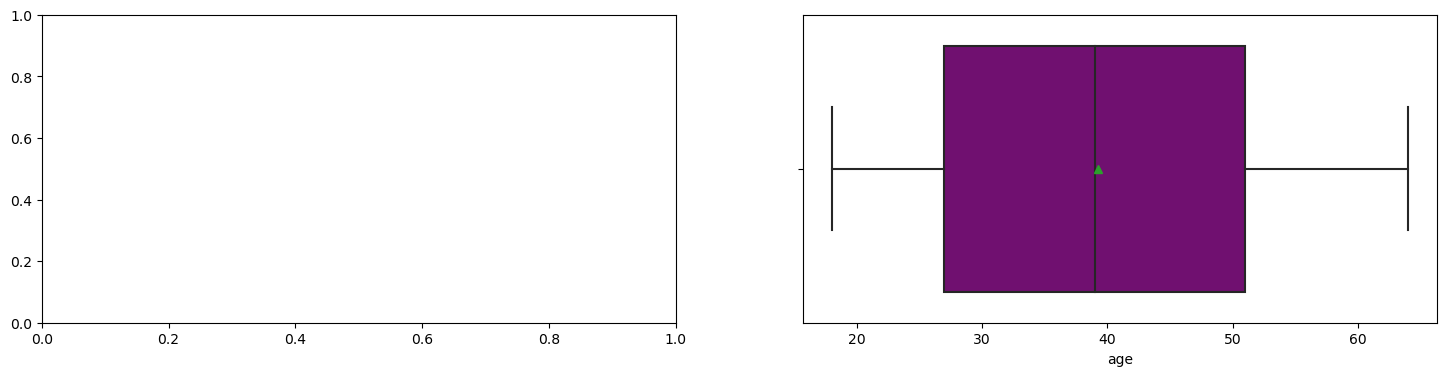

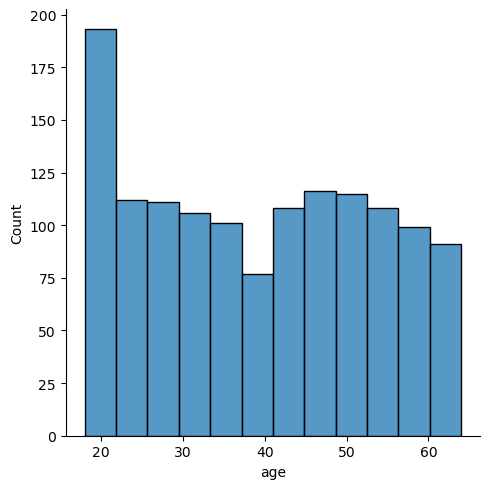

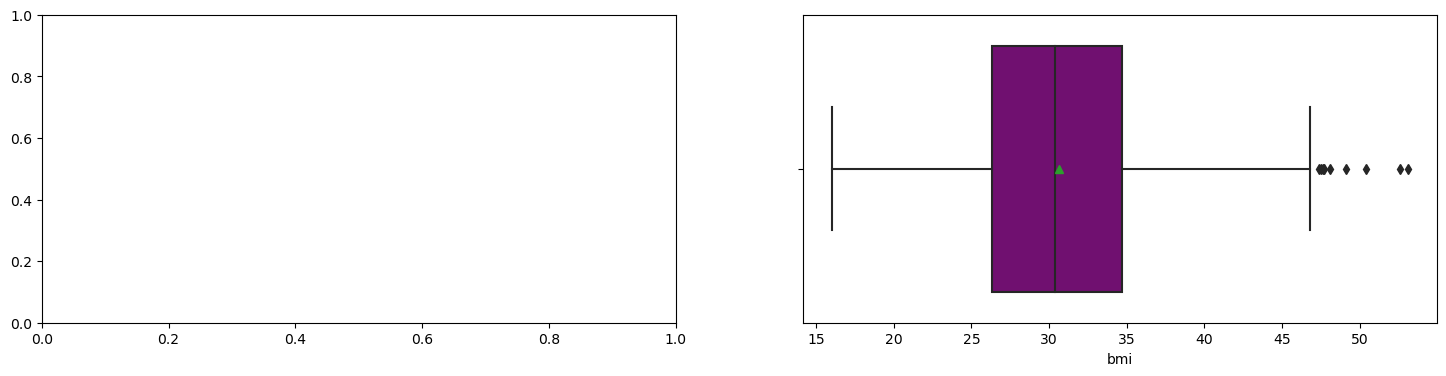

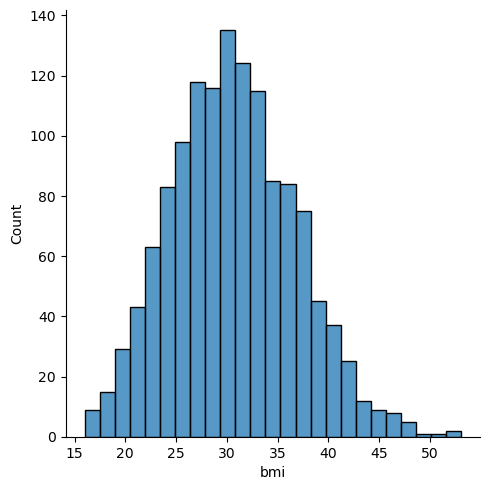

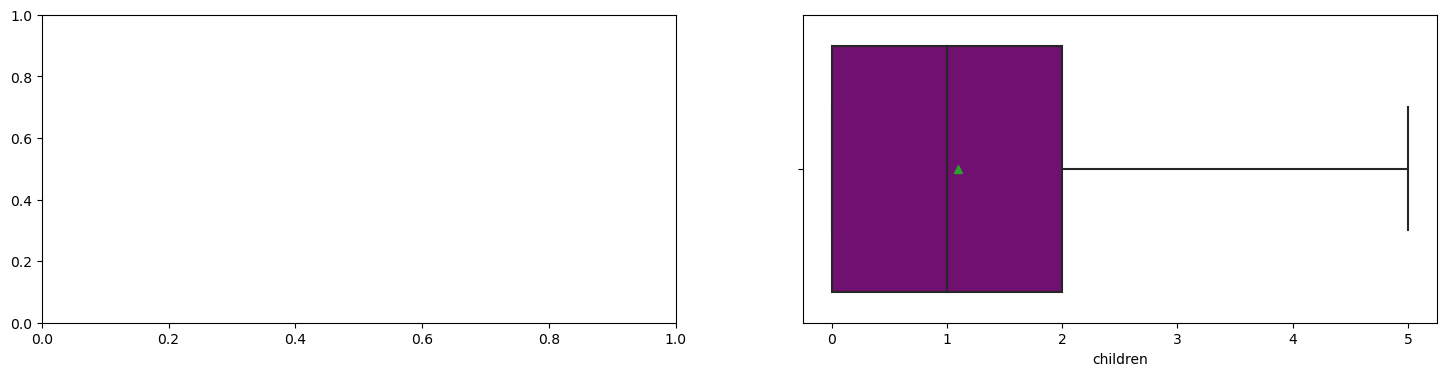

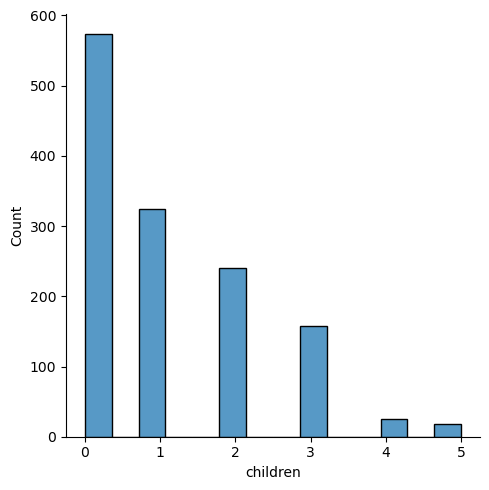

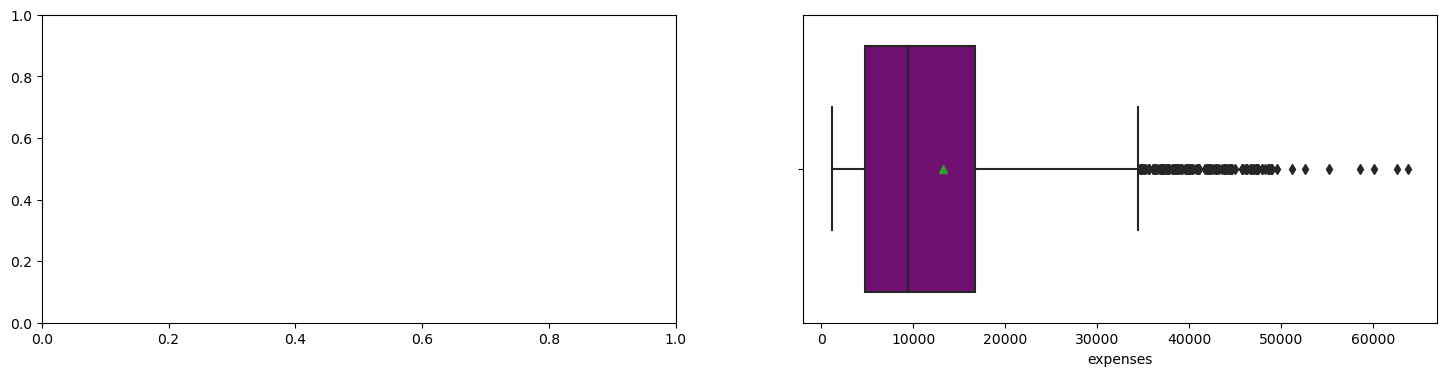

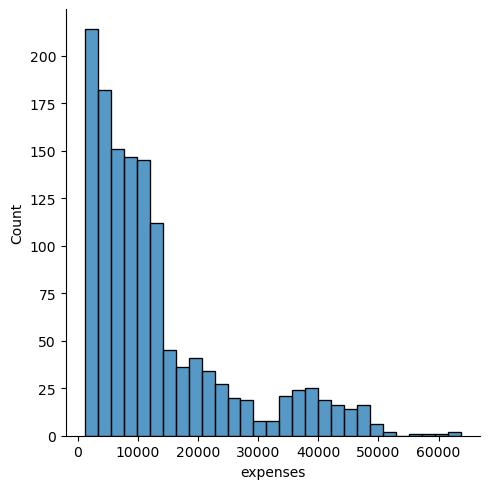

In [80]:
x_axis = ['age','bmi','children','expenses']
for x in x_axis:
    fig, axes = plt.subplots(1,2, figsize=(18,4))
    sns.displot(df[x], ax=axes[0], kde = False)
    sns.boxplot(df[x], ax=axes[1], orient="h", showmeans=True, color="purple")


HANDLE CATEGORICALS COLUMNS

In [81]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [82]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [83]:
df['sex'] = df.sex.map({'female':0, 'male':1})

In [84]:
df['smoker'] = df.smoker.map({'yes':1, 'no':0})

In [85]:
df['region'] = df.region.map({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})

In [86]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86


SPLIT THE DATA IN X AND Y 

In [87]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [90]:
x = df.drop(['expenses'], axis=1)
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,1
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,3
4,32,1,28.9,0,0,3


In [91]:
y = df[['expenses']]
y.head()

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


TRAIN TEST SPLIT

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


(1069, 6)

In [95]:
x_train.shape

(1069, 6)

In [97]:
x_test.shape

(268, 6)

MODEL TRAINING

LINEAR REGRESSION

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
lr = LinearRegression()

In [101]:
lr.fit(x_train, y_train)

LinearRegression()

In [103]:
y_pred = lr.predict(x_test)

In [105]:
from sklearn.metrics import r2_score

In [106]:
score1= r2_score(y_test, y_pred)

In [107]:
score1

0.8068280291899954

SUPPORT VECTOR REGRESSOR

In [118]:
from sklearn.svm import SVR

In [119]:
svm = SVR()

In [120]:
svm.fit(x_train, y_train)

SVR()

In [133]:
y_pred2 = svm.predict(x_test)

In [134]:
score2= r2_score(y_test, y_pred2)
score2

-0.1344469486786597

RANDOM FOREST REGRESSOR

In [124]:
from sklearn.ensemble import RandomForestRegressor


In [127]:
rf = RandomForestRegressor()

In [129]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [135]:
y_pred3 = rf.predict(x_test)

In [136]:
score3= r2_score(y_test, y_pred3)
score3

0.8813775475373534

FINAL RANDOM FOREST REGRESSOR

In [137]:
rf.fit(x_train, y_train)

RandomForestRegressor()

PREDICT EXPENSES IN CUSTORMER

In [160]:
data={
    'age': 19,
    'sex': 0,
    'bmi': 27.9,
    'chilren':0,
    'smoker': 1,
    'region': 1
    
}

new_df = pd.DataFrame(data, index=[0])
new_df

,age,sex,bmi,chilren,smoker,region
0,19,0,27.9,0,1,1


In [161]:
pred = rf.predict(new_df)
pred[0]

17035.185799999996

SAVE THE MODEL

In [162]:
import joblib
joblib.dump(rf, 'random_forest_regressor')

['random_forest_regressor']